In [6]:
import os
import json
from collections import defaultdict
import operator
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans as km
%matplotlib inline

In [7]:
n_tags = 1000

In [12]:
tags = defaultdict(int)
with open("lastfm_unique_tags.txt") as tagfile:
    for x in range(n_tags):
        tag = tagfile.readline().split("\t")
        tags[tag[0]] = int(tag[1][0:-1])

In [13]:
sorted_tags = sorted(tags.items(), key=operator.itemgetter(1), reverse=True)

In [14]:
indexed_tags = [(t[1][0], t[0]) for t in enumerate(sorted_tags[:n_tags])]

In [15]:
song_vector = defaultdict(int)
for root, subdirs, files in os.walk("data/"):
    for file in files:
        with open(os.path.join(root, file)) as file_data:
            file_data = json.load(file_data)
            vector = []
            file_tags = dict(file_data['tags'])
            for tag in indexed_tags:
                if tag[0] in file_tags:
                    vector.append(int(file_tags[tag[0]]))
                else:
                    vector.append(0)
            song_vector[file_data['track_id']] = vector

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [75]:
from sklearn.decomposition import PCA

In [76]:
from sklearn.pipeline import make_pipeline as mp

model = mp(km(n_clusters=n_tags//2), PCA(n_components=2))
model.fit(list(song_vector.values()))

#model = PCA(n_components=2)
#model.fit(list(song_vector.values()))

#model = km(n_clusters=2)
#model.fit(list(song_vector.values()))


Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=25, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [77]:
#model.explained_variance_ratio_

In [78]:
component = {}
for title,pc in song_vector.items():
    component[title] = model.transform([pc]).flatten()


In [79]:
import pandas as pd

In [80]:
df = pd.DataFrame(component).transpose()

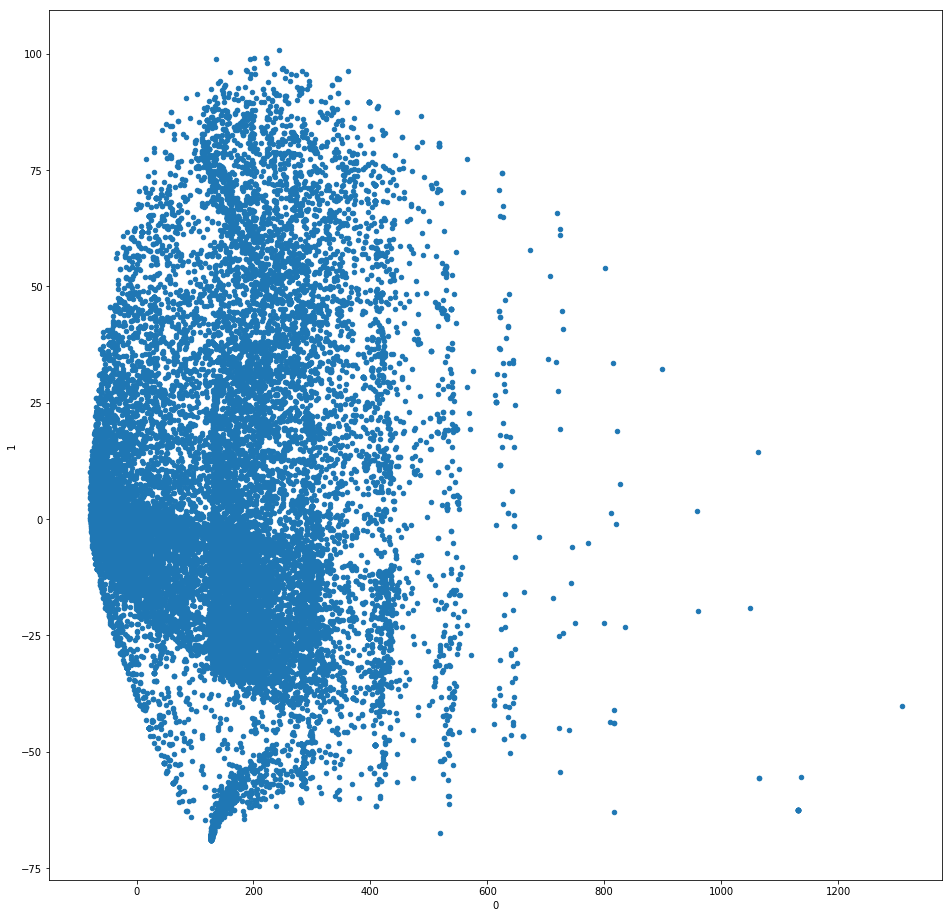

In [81]:
df.plot.scatter(x=0, y=1, figsize=(16, 16))

In [82]:
genres = {}
for tag in indexed_tags:
    genres[tag[0]] = [100 if x == tag[1] else 0 for x in range(n_tags)]

In [83]:
genres_pc = {k: model.transform([v]) for k, v in genres.items()}

{'rock': array([[ 113.11627162,   78.83519963]]), 'pop': array([[ 117.53985358,   -1.21816198]]), 'electronic': array([[ 125.59270839,  -27.99207207]]), 'alternative': array([[ 136.81726761,   33.87197163]]), 'indie': array([[ 132.37775679,   37.68223129]]), 'female vocalists': array([[ 125.30212588,   -7.86578929]]), 'jazz': array([[ 128.14061022,  -67.89135535]]), 'dance': array([[ 131.79267637,  -22.72848485]]), 'favorites': array([[ 152.26563938,   -4.92305671]]), 'Love': array([[ 151.03600487,   -5.98088373]]), '00s': array([[ 151.95748863,   -5.52321179]]), 'metal': array([[ 133.51635832,   -4.12102073]]), 'chillout': array([[ 147.76805943,  -11.13176801]]), 'electronica': array([[ 148.94593996,  -11.42497273]]), 'instrumental': array([[ 129.61360948,  -14.55259848]]), 'beautiful': array([[ 151.77680355,   -5.78293454]]), 'male vocalists': array([[ 151.39355982,   -6.4054603 ]]), 'soul': array([[ 125.49274746,  -22.84063556]]), 'alternative rock': array([[ 149.53608415,    6.5529